In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [2]:
df = df[df['job_title_short'] == 'Data Analyst'].copy()


In [3]:
# Explode the 'job_skills' into individual rows
df_exploded = df.explode('job_skills')

skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary=('salary_year_avg', 'median'),
    skill_count=('job_skills', 'count')
)

# Limit to the top 10 skills by highest salary
skill_stats = skill_stats.sort_values(by='skill_count', ascending=False).head(10)

skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380
r,92527.5,29996
sas,90000.0,27998
powerpoint,85000.0,13822
word,80000.0,13562


In [13]:
# Explode the 'job_skills' into individual rows
df_exploded = df.explode('job_skills')
skill_stats = df_exploded.groupby('job_skills').agg(
    median_salary = ('salary_year_avg','median'),
    skill_count = ('job_skills','count')
)
skill_stats = skill_stats.sort_values(by = "skill_count", ascending=False).head(7)
skill_stats

,median_salary,skill_count
job_skills,,
sql,92500.0,92428
excel,84479.0,66860
python,98500.0,57190
tableau,95000.0,46455
power bi,90000.0,39380
r,92527.5,29996
sas,90000.0,27998


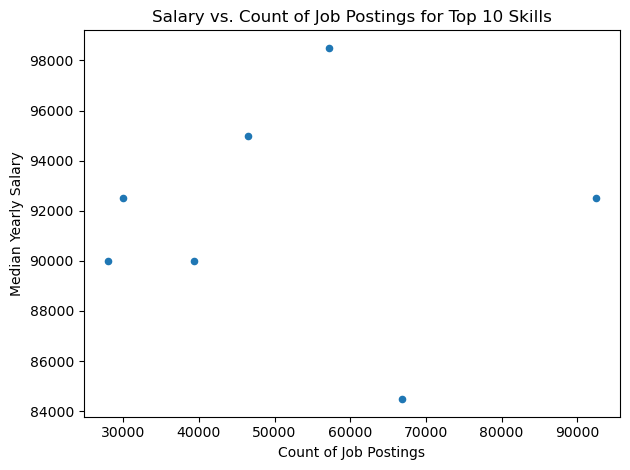

In [ ]:
skill_stats.plot(kind = 'scatter', x = "skill_count", y = "median_salary")
plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Job Postings for Top 10 Skills')
plt.tight_layout()
plt.show()

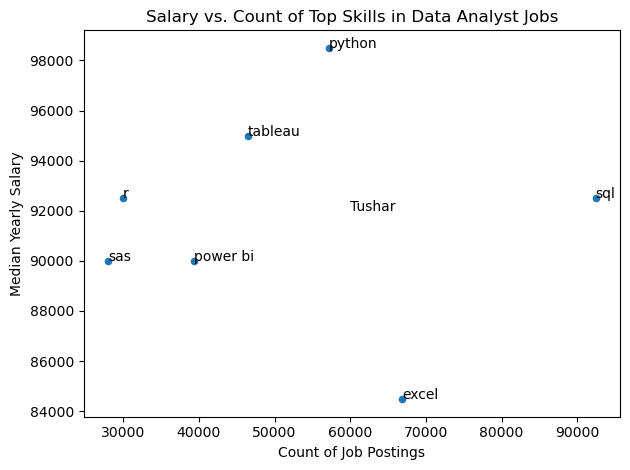

In [22]:
skill_stats.plot(kind='scatter', x='skill_count', y='median_salary')
plt.text(60000,92000,"Tushar")
# plt.text() function to label the points
for i, txt in enumerate(skill_stats.index):
    plt.text(skill_stats['skill_count'].iloc[i], skill_stats['median_salary'].iloc[i], txt)

plt.xlabel('Count of Job Postings')
plt.ylabel('Median Yearly Salary')
plt.title('Salary vs. Count of Top Skills in Data Analyst Jobs')
plt.tight_layout()
plt.show()

In [23]:
skill_stats['skill_count']

job_skills
sql         92428
excel       66860
python      57190
tableau     46455
power bi    39380
r           29996
sas         27998
Name: skill_count, dtype: int64

In [29]:
skill_stats['median_salary']

job_skills
sql         92500.0
excel       84479.0
python      98500.0
tableau     95000.0
power bi    90000.0
r           92527.5
sas         90000.0
Name: median_salary, dtype: float64

In [31]:
print(skill_stats['median_salary'].iloc[1])

84479.0
